## IMDB Review Classification as Positive or Negative

This project is the implementation of IMDB Reviews classification example in Deep Learning with Python book.

In this project, we try to build a model that classifes IMDB reviews as either positive or negative reviews using Deep Learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score

Import Dataset

In [2]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)
print('Train Data Size: {}, Test Data size: {}'.format(len(train_data), len(test_data)))

Train Data Size: 25000, Test Data size: 25000


Build Deep Learning model architecture

In [3]:
def build_model():
  model = models.Sequential(name='BinaryClassifier')
  model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

model = build_model()

In [4]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Pre-Process the Dataset

Encode the data into vectors of words

In [5]:
# naive implementation of One Hot Encoding
def vectorize(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    result[i, sequence] += 1
  return result

train_data_encoded = vectorize(train_data)
X_test = vectorize(test_data)

train_label_encoded = np.asarray(train_label).astype('float32')
Y_test = np.asarray(test_label).astype('float32')

X_train, X_val, Y_train, Y_val = train_test_split(train_data_encoded, train_label_encoded, test_size=0.2, random_state=0)

In [6]:
history = model.fit(x=X_train, y=Y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val))

Epoch 1/20
40/40 [==============================] - 1s 34ms/step - loss: 0.5521 - accuracy: 0.7590 - val_loss: 0.4121 - val_accuracy: 0.8780
Epoch 2/20
40/40 [==============================] - 1s 28ms/step - loss: 0.3296 - accuracy: 0.8989 - val_loss: 0.2986 - val_accuracy: 0.8930
Epoch 3/20
40/40 [==============================] - 1s 28ms/step - loss: 0.2343 - accuracy: 0.9209 - val_loss: 0.2666 - val_accuracy: 0.8972
Epoch 4/20
40/40 [==============================] - 1s 28ms/step - loss: 0.1866 - accuracy: 0.9370 - val_loss: 0.2812 - val_accuracy: 0.8874
Epoch 5/20
40/40 [==============================] - 1s 29ms/step - loss: 0.1546 - accuracy: 0.9485 - val_loss: 0.2646 - val_accuracy: 0.8974
Epoch 6/20
40/40 [==============================] - 1s 28ms/step - loss: 0.1329 - accuracy: 0.9560 - val_loss: 0.2744 - val_accuracy: 0.8966
Epoch 7/20
40/40 [==============================] - 1s 29ms/step - loss: 0.1130 - accuracy: 0.9639 - val_loss: 0.2941 - val_accuracy: 0.8912
Epoch 8/20
40

In [8]:
model.evaluate(X_test, Y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7725 - accuracy: 0.8484


[0.7724671959877014, 0.8484399914741516]

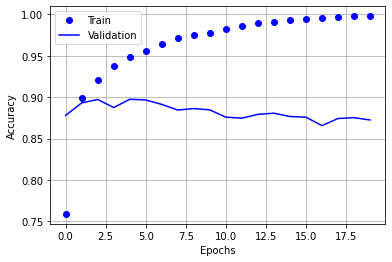

In [17]:
history_dict = history.history
acc, loss, val_acc, val_loss = history_dict['accuracy'], history_dict['loss'], history_dict['val_accuracy'], history_dict['val_loss']

xaxis = range(0, len(acc))
plt.plot(xaxis, acc, 'bo', label='Train')
plt.plot(xaxis, val_acc, 'b', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

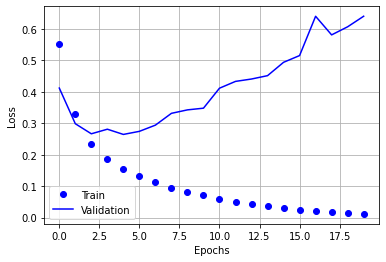

In [18]:
xaxis = range(len(acc))
plt.plot(xaxis, loss, 'bo', label='Train')
plt.plot(xaxis, val_loss, 'b', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

The model starts to overfit after Epoch 4, so buildig a new model with 4 epochs.

In [19]:
model.fit(x=X_train, y=Y_train, epochs=4, batch_size=512, validation_data=(X_val, Y_val))

Epoch 1/4
40/40 [==============================] - 1s 32ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.6733 - val_accuracy: 0.8706
Epoch 2/4
40/40 [==============================] - 1s 28ms/step - loss: 0.0057 - accuracy: 0.9995 - val_loss: 0.7102 - val_accuracy: 0.8710
Epoch 3/4
40/40 [==============================] - 1s 28ms/step - loss: 0.0064 - accuracy: 0.9988 - val_loss: 0.7518 - val_accuracy: 0.8688
Epoch 4/4
40/40 [==============================] - 1s 28ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.7763 - val_accuracy: 0.8688


In [20]:
model.evaluate(X_test, Y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.9302 - accuracy: 0.8457


[0.9302404522895813, 0.8457199931144714]